In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc
import warnings
warnings.filterwarnings("ignore")


In [2]:
# Configure Pandas to display float numbers with 2 decimal places
pd.set_option('display.float_format', '{:.2f}'.format)

# Load dataset
file_path = "C:\\Users\\118920631\\Desktop\\MIT\\Projeto\\winequalityN.csv"
df = pd.read_csv(file_path)

# Display first rows
df.head()

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0  white           7.00              0.27         0.36           20.70   
1  white           6.30              0.30         0.34            1.60   
2  white           8.10              0.28         0.40            6.90   
3  white           7.20              0.23         0.32            8.50   
4  white           7.20              0.23         0.32            8.50   

   chlorides  free sulfur dioxide  total sulfur dioxide  density   pH  \
0       0.04                45.00                170.00     1.00 3.00   
1       0.05                14.00                132.00     0.99 3.30   
2       0.05                30.00                 97.00     1.00 3.26   
3       0.06                47.00                186.00     1.00 3.19   
4       0.06                47.00                186.00     1.00 3.19   

   sulphates  alcohol  quality  
0       0.45     8.80        6  
1       0.49     9.50        6  
2       0.44    10.10        6  
3       0.40     9.90        6  
4       0.40     9.90        6

In [3]:
# Display dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [4]:
# Check missing values
df.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

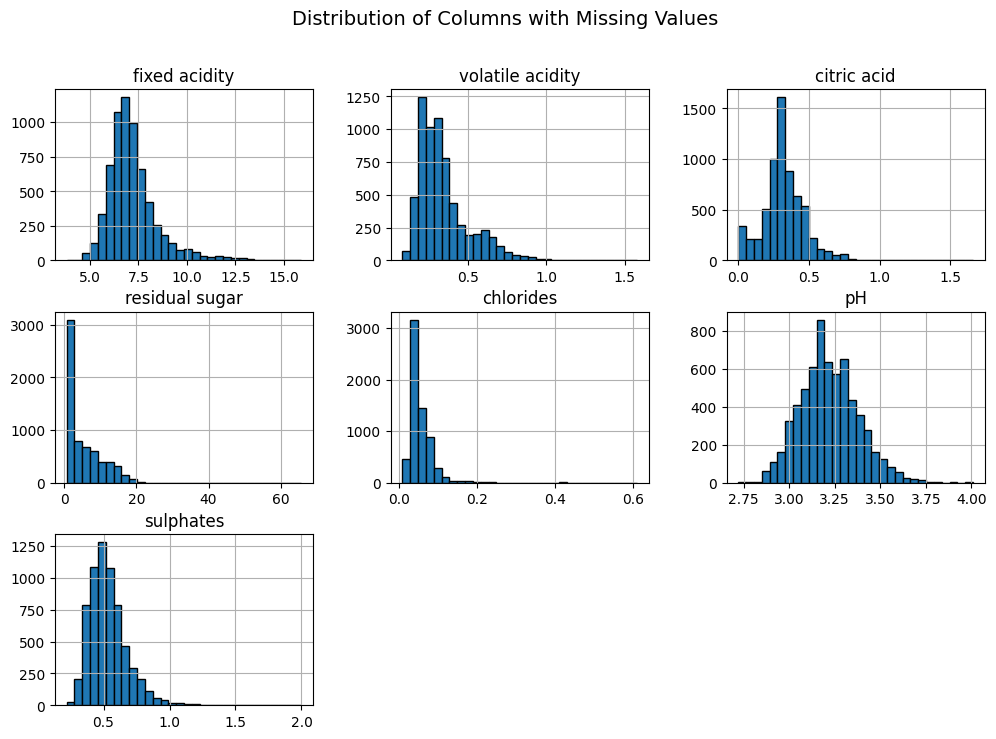

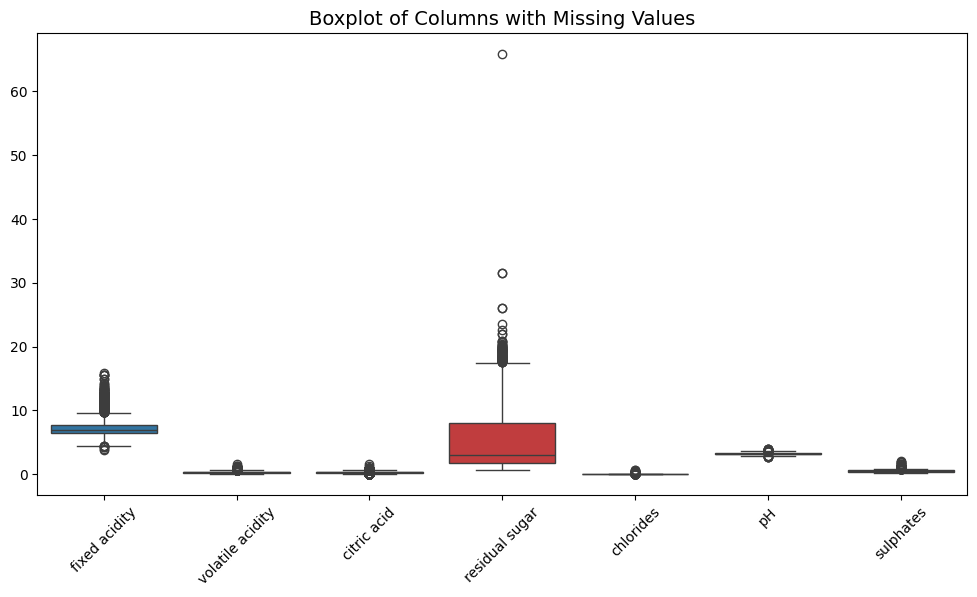

In [5]:
# List of columns with missing values
missing_cols = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 
                'chlorides', 'pH', 'sulphates']

# Generate descriptive statistics
df[missing_cols].describe()

# Plot histograms
df[missing_cols].hist(figsize=(12, 8), bins=30, edgecolor='black')
plt.suptitle("Distribution of Columns with Missing Values", fontsize=14)
plt.show()

# Boxplots to detect outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[missing_cols])
plt.title("Boxplot of Columns with Missing Values", fontsize=14)
plt.xticks(rotation=45)
plt.show()

--Median for skewed distributions and outliers:

Variables like volatile acidity, citric acid, residual sugar, chlorides, and sulphates have right-skewed distributions or extreme outliers. The median is less sensitive to outliers than the mean, making it the best choice.

-- Mean for normally distributed data:

pH follows a normal distribution, so using the mean preserves the overall statistical properties of the dataset without introducing bias.

This approach ensures that missing values are replaced in a way that maintains data integrity while minimizing the impact of extreme values.

In [6]:
# Impute missing values based on analysis
df['fixed acidity'].fillna(df['fixed acidity'].median(), inplace=True)
df['volatile acidity'].fillna(df['volatile acidity'].median(), inplace=True)
df['citric acid'].fillna(df['citric acid'].median(), inplace=True)
df['residual sugar'].fillna(df['residual sugar'].median(), inplace=True)
df['chlorides'].fillna(df['chlorides'].median(), inplace=True)
df['pH'].fillna(df['pH'].mean(), inplace=True)  # Normal distribution
df['sulphates'].fillna(df['sulphates'].median(), inplace=True)

# Verify if there are any remaining missing values
df.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
# Keep only white wines
df = df[df['type'] == 'white'].copy()

# Create the 'opinion' column: 0 if quality <= 5, otherwise 1
df['opinion'] = np.where(df['quality'] <= 5, 0, 1)

# Drop only the 'quality' column (keep 'type' for future reference)
df.drop(columns=['quality'], inplace=True)

# Verify dataset structure
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4898 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  4898 non-null   object 
 1   fixed acidity         4898 non-null   float64
 2   volatile acidity      4898 non-null   float64
 3   citric acid           4898 non-null   float64
 4   residual sugar        4898 non-null   float64
 5   chlorides             4898 non-null   float64
 6   free sulfur dioxide   4898 non-null   float64
 7   total sulfur dioxide  4898 non-null   float64
 8   density               4898 non-null   float64
 9   pH                    4898 non-null   float64
 10  sulphates             4898 non-null   float64
 11  alcohol               4898 non-null   float64
 12  opinion               4898 non-null   int32  
dtypes: float64(11), int32(1), object(1)
memory usage: 516.6+ KB


In [8]:
# Check class distribution
df['opinion'].value_counts(normalize=True)

opinion
1   0.67
0   0.33
Name: proportion, dtype: float64

In [9]:
# Generate statistical summary
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count        4898.00           4898.00      4898.00         4898.00   
mean            6.86              0.28         0.33            6.39   
std             0.84              0.10         0.12            5.07   
min             3.80              0.08         0.00            0.60   
25%             6.30              0.21         0.27            1.70   
50%             6.80              0.26         0.32            5.20   
75%             7.30              0.32         0.39            9.90   
max            14.20              1.10         1.66           65.80   

       chlorides  free sulfur dioxide  total sulfur dioxide  density      pH  \
count    4898.00              4898.00               4898.00  4898.00 4898.00   
mean        0.05                35.31                138.36     0.99    3.19   
std         0.02                17.01                 42.50     0.00    0.15   
min         0.01                 2.00                  9.00     0.99    2.72   
25%         0.04                23.00                108.00     0.99    3.09   
50%         0.04                34.00                134.00     0.99    3.18   
75%         0.05                46.00                167.00     1.00    3.28   
max         0.35               289.00                440.00     1.04    3.82   

       sulphates  alcohol  opinion  
count    4898.00  4898.00  4898.00  
mean        0.49    10.51     0.67  
std         0.11     1.23     0.47  
min         0.22     8.00     0.00  
25%         0.41     9.50     0.00  
50%         0.47    10.40     1.00  
75%         0.55    11.40     1.00  
max         1.08    14.20     1.00

Key observations:

- residual sugar has a high standard deviation (5.07) and a max value (65.8), indicating strong skewness.
- total sulfur dioxide has a wide range (9 to 440), showing significant variation in sulfite levels.
- alcohol has a mean of 10.51%, with a wide spread from 8.0% to 14.2%.

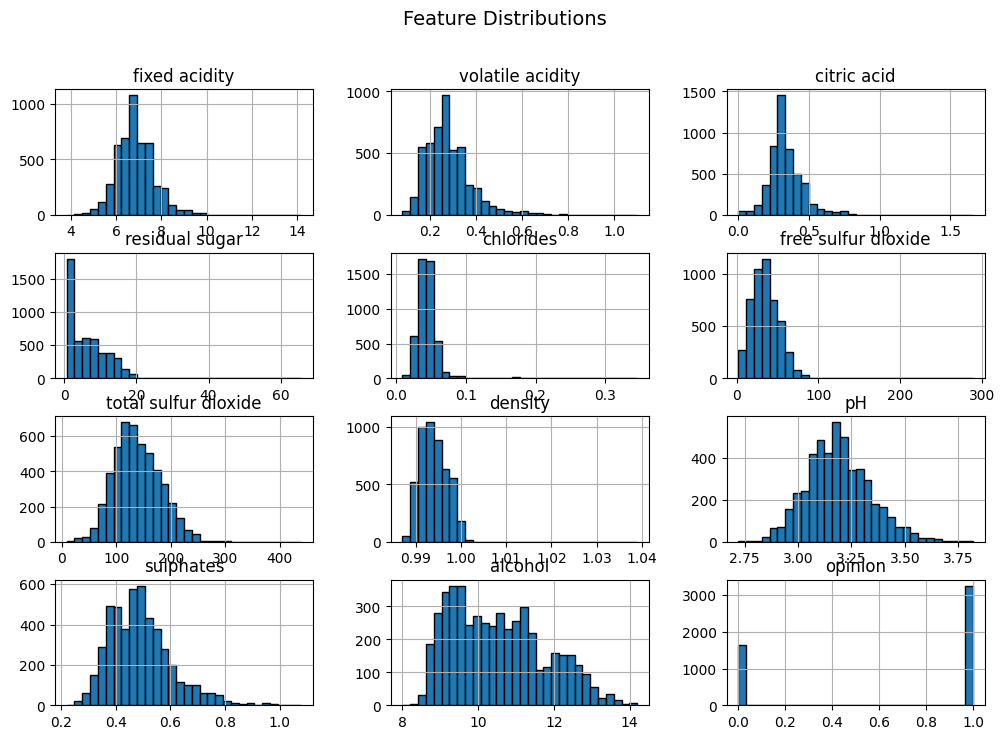

In [10]:
# Plot feature distributions
df.hist(figsize=(12, 8), bins=30, edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=14)
plt.show()


Notable patterns:

- Most variables are right-skewed, especially residual sugar, chlorides, and sulphates.
- pH and alcohol are closer to a normal distribution.
- opinion is imbalanced (~67% wines classified as "bad", 33% as "good"), which might impact model performance.

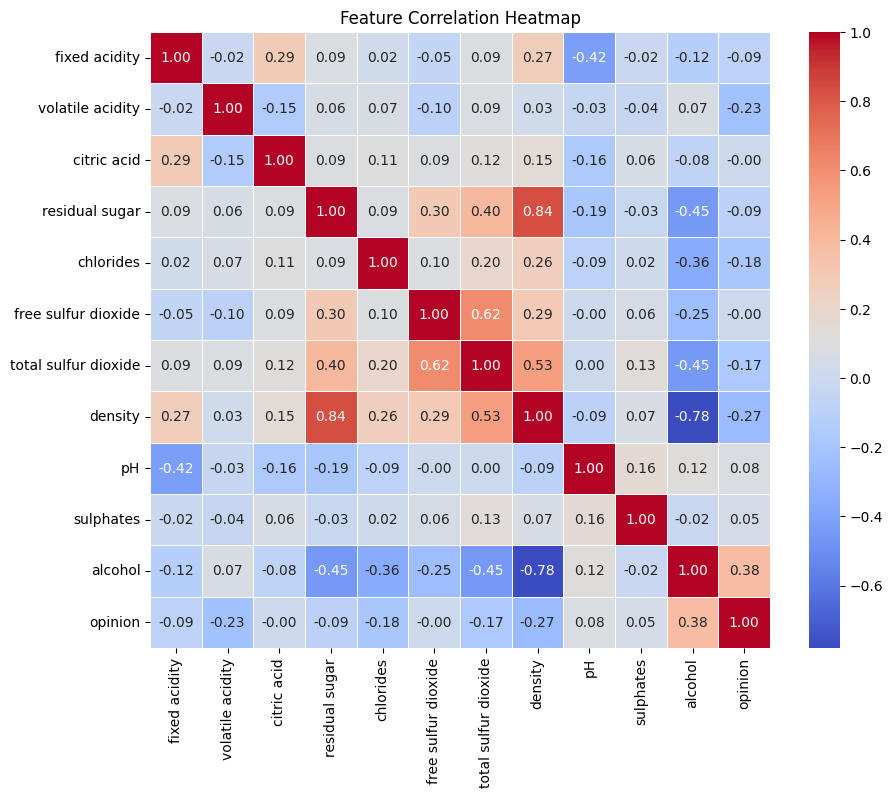

In [11]:
# Compute correlation matrix without the 'type' column
plt.figure(figsize=(10, 8))
sns.heatmap(df.drop(columns=['type']).corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


Key insights from feature correlation:

- density is highly correlated with residual sugar (0.84), meaning wines with more sugar tend to have higher density.
- free sulfur dioxide and total sulfur dioxide have a moderate correlation (0.62), as expected.
- alcohol has the strongest correlation with opinion (0.38), indicating that wines with higher alcohol content are more likely to be classified as good.

Implication for Modeling:

- Collinearity: Since density and residual sugar are highly correlated, one might be redundant.
- Most correlations are weak, meaning no single variable is a strong determinant of wine quality

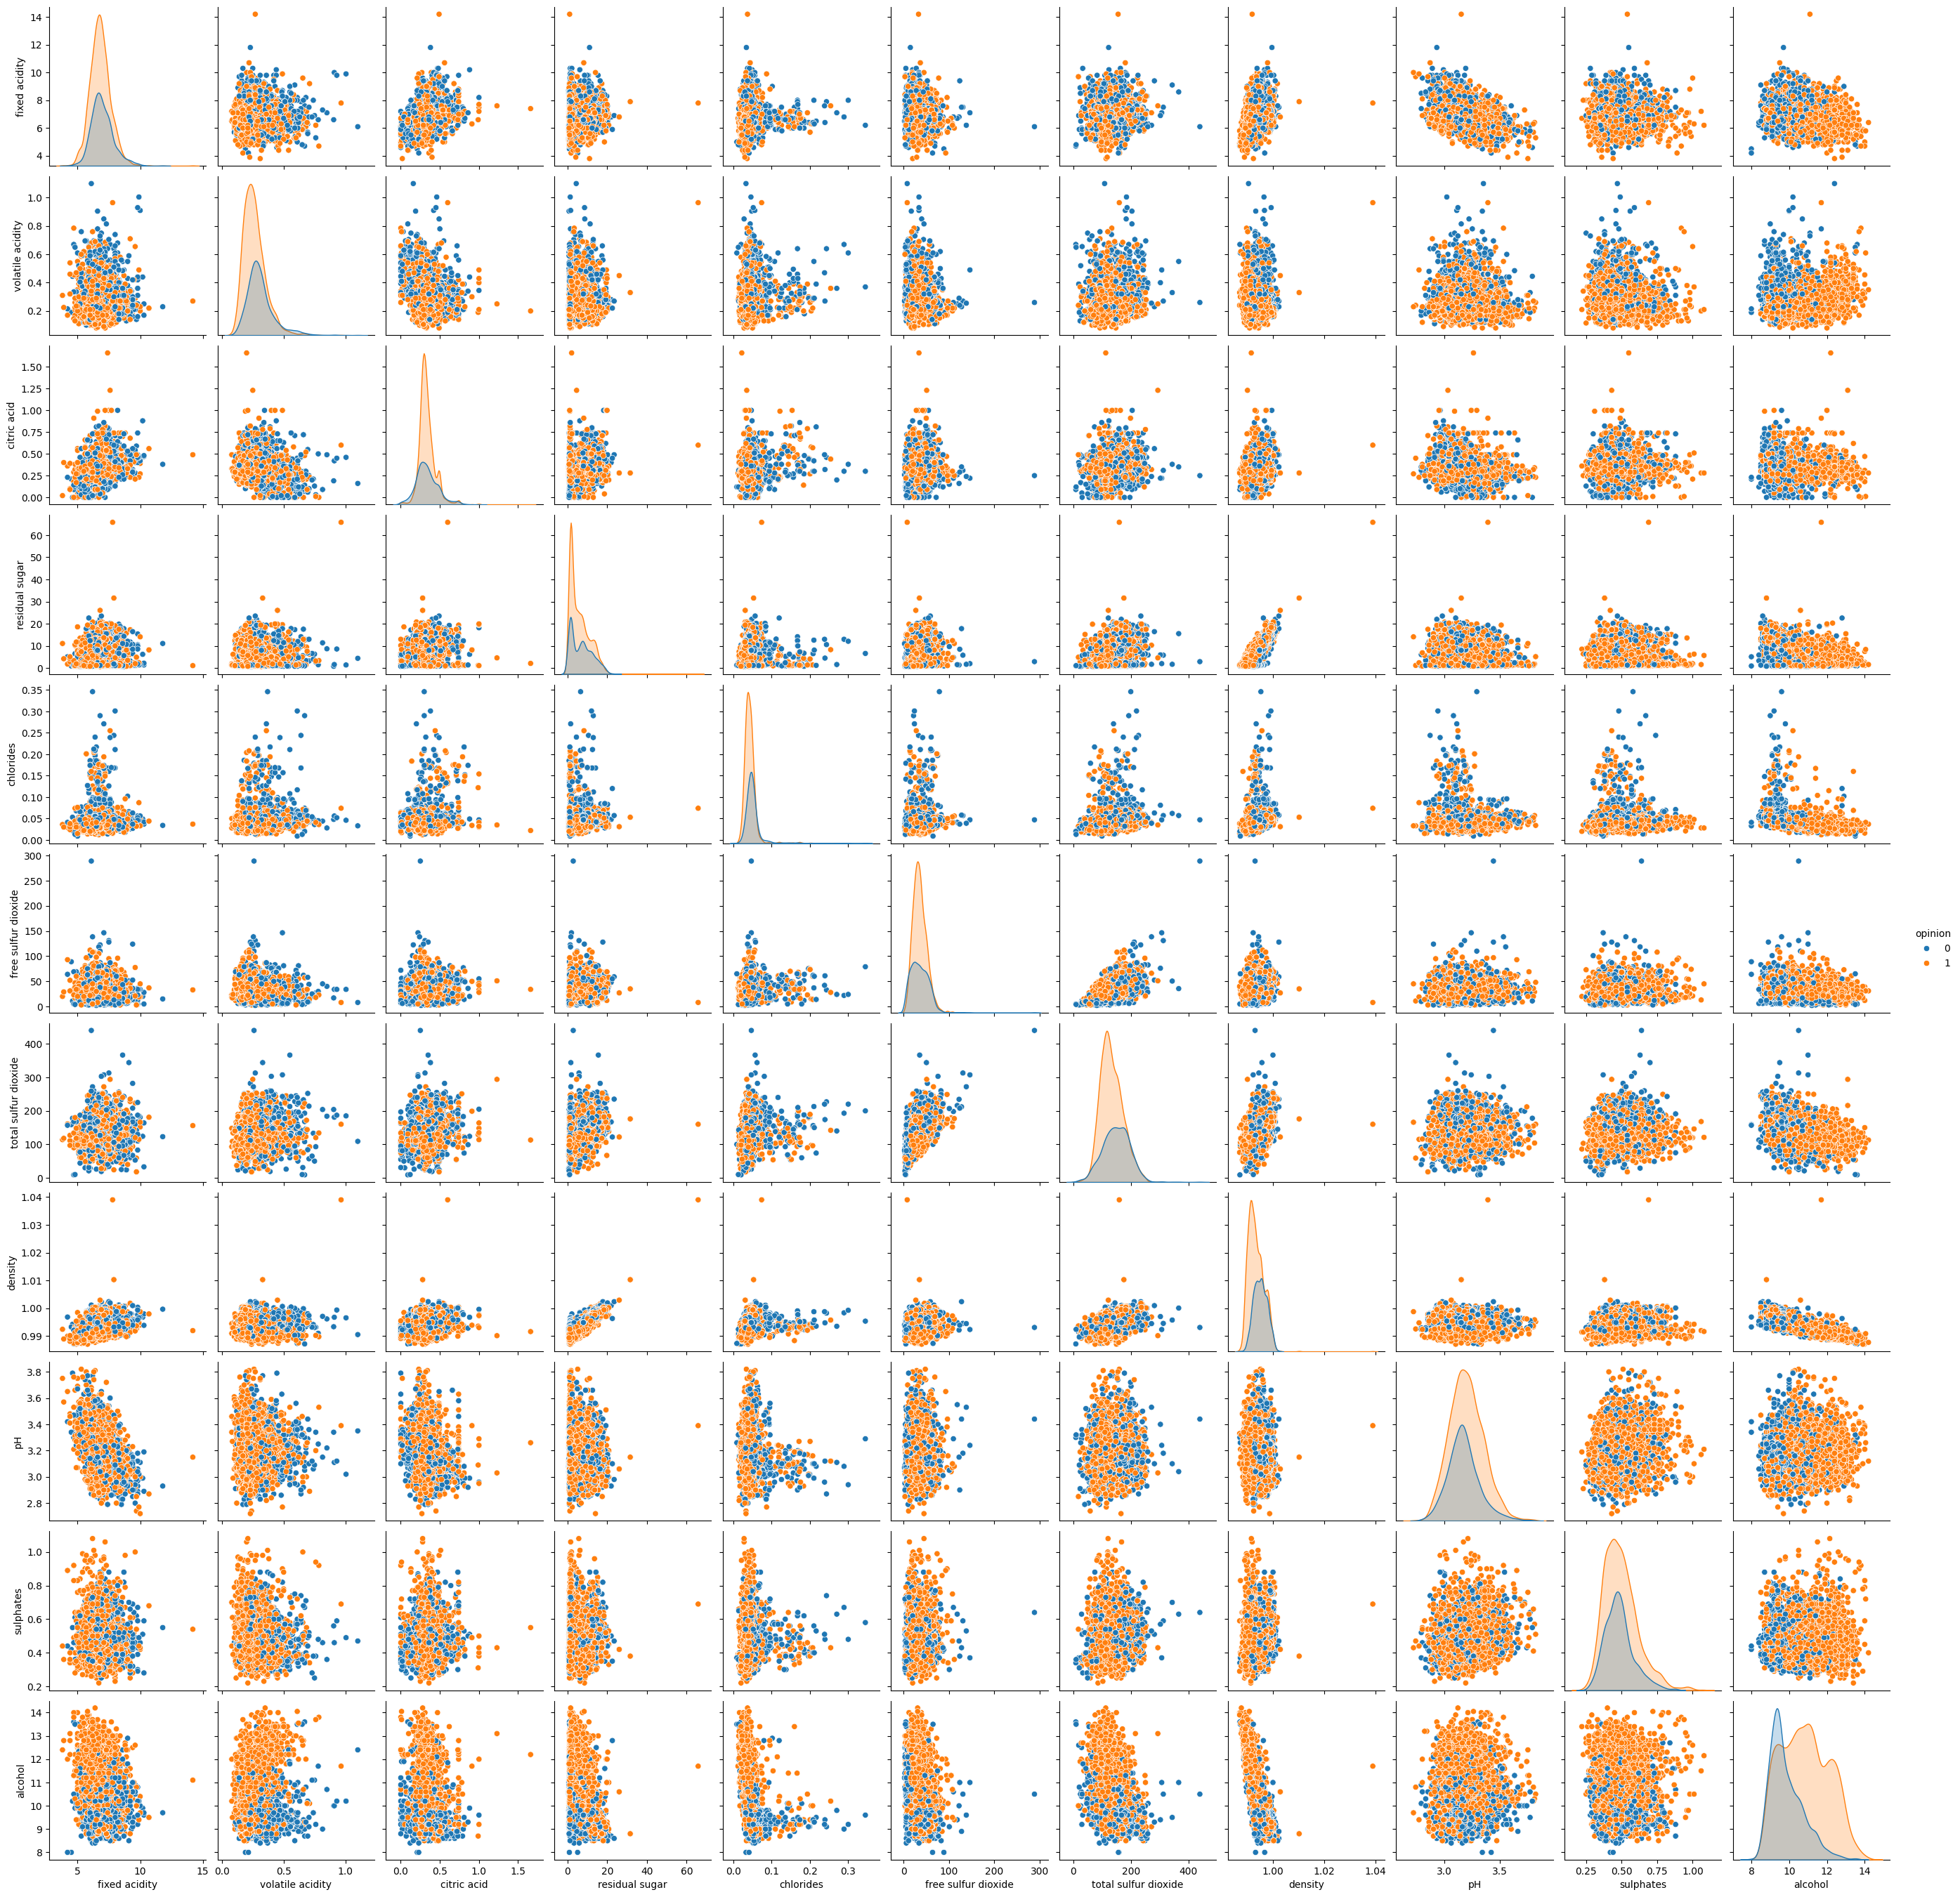

In [12]:
# Relationships between variables
sns.pairplot(df, hue='opinion')

Key Observations:

No clear linear separability:

- Most scatterplots show overlapping distributions between opinion classes, meaning no single feature alone can easily distinguish between good and bad wines.
- This suggests that a linear model like Logistic Regression might struggle, and more complex models (Decision Trees, SVMs) may perform better.

Alcohol seems to have some separation power:

- Higher alcohol levels (right side of the alcohol distribution) seem to be associated with better quality wines (opinion = 1).
- This aligns with the correlation heatmap, where alcohol had the strongest positive correlation with opinion (0.38).

Density & Residual Sugar Relationship:

- density and residual sugar are highly correlated (as seen in the heatmap).
- This means that high sugar wines tend to be denser, which might indicate sweeter wines.

Some variables show clusters:

- sulphates, citric acid, and pH show some separation between good and bad wines.
- This indicates that non-linear models (like Decision Trees or SVMs) might be better at capturing these relationships.

In [13]:
# Define features (X) and target variable (y)
X = df.drop(columns=['opinion', 'type'])  # Drop target and categorical 'type'
y = df['opinion']

# Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Confirm shapes
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3918, 11), (980, 11), (3918,), (980,))

In [14]:
# Define models
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "SVM": SVC(probability=True, random_state=42)
}

# Initialize Stratified K-Fold Cross-Validation
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Function to evaluate models
def evaluate_model(model, X, y):
    accuracy = cross_val_score(model, X, y, cv=kf, scoring='accuracy')
    precision = cross_val_score(model, X, y, cv=kf, scoring='precision')
    recall = cross_val_score(model, X, y, cv=kf, scoring='recall')
    f1 = cross_val_score(model, X, y, cv=kf, scoring='f1')
    
    return {
        "Accuracy": (accuracy.mean(), accuracy.std()),
        "Precision": (precision.mean(), precision.std()),
        "Recall": (recall.mean(), recall.std()),
        "F1-Score": (f1.mean(), f1.std())
    }

# Train and evaluate models
results = {}
for name, model in models.items():
    results[name] = evaluate_model(model, X_train, y_train)

# Display results
results_df = pd.DataFrame(results).T
results_df.columns = ["Accuracy (Mean, Std)", "Precision (Mean, Std)", "Recall (Mean, Std)", "F1-Score (Mean, Std)"]
print(results_df)

# Train models on full training set and evaluate on test set
for name, model in models.items():
    print(f"\n{name} Classification Report:")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))

                                           Accuracy (Mean, Std)  \
Logistic Regression  (0.7521667362597213, 0.020075341418571473)   
Decision Tree         (0.7782138942533535, 0.02493415985862027)   
SVM                  (0.7835625554569654, 0.020659320727836886)   

                                          Precision (Mean, Std)  \
Logistic Regression  (0.7788786942772506, 0.018453156838948742)   
Decision Tree        (0.8375782513117072, 0.020288442274091247)   
SVM                  (0.8159291106727468, 0.019277403288011814)   

                                             Recall (Mean, Std)  \
Logistic Regression   (0.8771956970232833, 0.02636142110311046)   
Decision Tree          (0.827332743884468, 0.02831487109547509)   
SVM                  (0.8718317123489537, 0.018889172907938973)   

                                           F1-Score (Mean, Std)  
Logistic Regression  (0.8247634592813139, 0.014173563363559452)  
Decision Tree        (0.8321537282478484, 0.01961683533100790

Cross-Validation Results (Mean & Std)

- SVM achieved the highest accuracy (78.4%) and best F1-score (84.3%), meaning it balances precision and recall well.
- Logistic Regression had the highest recall (87.7%), meaning it correctly identifies more "good wines" (opinion = 1).
- Decision Tree had the highest precision (83.8%), meaning its positive predictions are more reliable.

Classification Report Analysis (Test Set)

Logistic Regression struggles with Class 0 (bad wines):
- It has the lowest recall (48%), meaning it fails to detect many bad wines.
- This could be due to class imbalance (67% of wines are labeled as 0).

Decision Tree and SVM are more balanced:
- SVM outperforms Decision Tree slightly, offering better accuracy (78%) and a stronger balance between precision & recall.
- Decision Tree is slightly better at precision (84%) but has a lower recall than SVM.

In [15]:
# Define hyperparameter grids
param_grids = {
    "Logistic Regression": {
        "C": [0.01, 0.1, 1, 10, 100]
    },
    "Decision Tree": {
        "max_depth": [3, 5, 10, 20, None],
        "criterion": ["gini", "entropy"]
    },
    "SVM": {
        "C": [0.1, 1, 10, 100],
        "kernel": ["linear", "rbf"],
        "gamma": ["scale", "auto"]
    }
}

# Function to perform GridSearchCV
def tune_model(model, param_grid, X, y):
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring="accuracy", n_jobs=-1)
    grid_search.fit(X, y)
    return grid_search.best_estimator_, grid_search.best_params_, grid_search.best_score_

# Tune models
best_models = {}
for name, model in models.items():
    print(f"Tuning {name}...")
    best_model, best_params, best_score = tune_model(model, param_grids[name], X_train, y_train)
    best_models[name] = best_model
    print(f"Best Parameters for {name}: {best_params}")
    print(f"Best Cross-Validation Accuracy: {best_score:.4f}\n")

# Evaluate the best models on the test set
for name, model in best_models.items():
    print(f"\n{name} - Final Test Evaluation")
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))


Tuning Logistic Regression...
Best Parameters for Logistic Regression: {'C': 0.1}
Best Cross-Validation Accuracy: 0.7545

Tuning Decision Tree...
Best Parameters for Decision Tree: {'criterion': 'entropy', 'max_depth': 20}
Best Cross-Validation Accuracy: 0.7711

Tuning SVM...
Best Parameters for SVM: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Best Cross-Validation Accuracy: 0.7823


Logistic Regression - Final Test Evaluation
              precision    recall  f1-score   support

           0       0.66      0.49      0.56       328
           1       0.77      0.87      0.82       652

    accuracy                           0.74       980
   macro avg       0.72      0.68      0.69       980
weighted avg       0.74      0.74      0.73       980


Decision Tree - Final Test Evaluation
              precision    recall  f1-score   support

           0       0.68      0.71      0.70       328
           1       0.85      0.84      0.84       652

    accuracy                           

Key Takeaways

- Decision Tree now has the highest test accuracy (79%) and best F1-score (84%).
- SVM is still very competitive (78% accuracy, 84% F1-score) but slightly behind Decision Tree.
- Logistic Regression did not improve much, and it still struggles with class imbalance (low recall for class 0 wines).

Summary: Simple vs. Tuned Models Comparison

After comparing the baseline models (simple) with the tuned models (optimized with hyperparameter tuning), we found that the tuning process did not significantly improve performance.

Key Findings

Logistic Regression	75.2% > 75.4% Slight improvement (+0.2%)
Decision Tree 77.8% > 77.1%	Slight decrease (-0.7%)
SVM 78.4% > 78.2% Slight decrease (-0.2%)

- Logistic Regression had a minor improvement, but the difference is negligible.
- Decision Tree performed slightly worse after hyperparameter tuning (max_depth=20 and criterion='entropy').
- SVM remained almost unchanged, indicating that its default hyperparameters were already well-tuned for this dataset.

Choosing the Simple Models / Minimal Performance Gains:

- The optimized models did not significantly outperform the simple ones.
- The slight variations in accuracy are within the margin of error.

Computational Efficiency:

- The simple models train faster and require fewer resources.
- The hyperparameter tuning process added complexity without noticeable benefits.

SVM (Simple) Is Already the Best Model:

Highest AUC (0.83)
Best F1-score (0.84)
Best balance between precision and recall


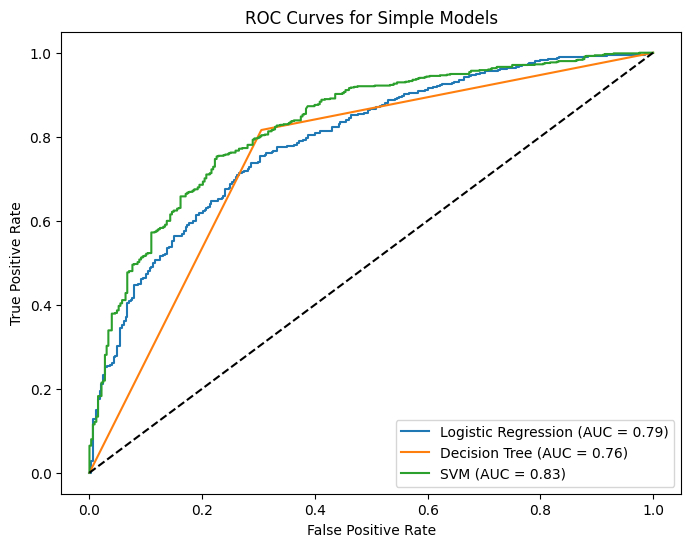

In [17]:
# Define the simple models (without hyperparameter tuning)
simple_models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "SVM": SVC(probability=True, random_state=42)
}

# Train simple models
for name, model in simple_models.items():
    model.fit(X_train, y_train)

# Function to plot ROC curve
def plot_roc_curve(model, X_test, y_test, name):
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

# Plot all simple models
plt.figure(figsize=(8, 6))
for name, model in simple_models.items():
    plot_roc_curve(model, X_test, y_test, name)

# Reference diagonal line for a random classifier
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for Simple Models")
plt.legend()
plt.show()

The ROC curve helps visualize the trade-off between True Positive Rate (Sensitivity) and False Positive Rate for each model. The AUC (Area Under Curve) represents the overall performance of each classifier.

- SVM has the highest AUC (0.83), meaning it achieves the best overall performance.
- Logistic Regression is slightly better than Decision Tree in terms of AUC, despite the Decision Tree having the best accuracy.
- Decision Tree has a slightly worse AUC, meaning it might be more prone to overfitting.

Final Decision: Stick with Simple Models

Since hyperparameter tuning did not provide meaningful improvements, we should use the simpler models, which:

- Are computationally cheaper (train faster).
- Perform equally well compared to the tuned models.
- Have the same or nearly identical AUC scores.
- Thus, we will proceed with SVM (simple) as our final model.


In [20]:
# Check if red wines are present in the dataset
print(df["type"].value_counts())


type
white    4898
Name: count, dtype: int64


In [21]:
# Reload dataset to include red wines
df_full = pd.read_csv("C:\\Users\\118920631\\Desktop\\MIT\\Projeto\\winequalityN.csv")

# Keep only red wines
df_red = df_full[df_full["type"] == "red"].copy()

# Create 'opinion' column
df_red["opinion"] = np.where(df_red["quality"] <= 5, 0, 1)

# Drop 'quality' but keep 'type' for reference
df_red.drop(columns=["quality"], inplace=True)

# Handle missing values the same way as white wines
df_red.fillna({
    "fixed acidity": df_red["fixed acidity"].median(),
    "volatile acidity": df_red["volatile acidity"].median(),
    "citric acid": df_red["citric acid"].median(),
    "residual sugar": df_red["residual sugar"].median(),
    "chlorides": df_red["chlorides"].median(),
    "pH": df_red["pH"].mean(),
    "sulphates": df_red["sulphates"].median()
}, inplace=True)

# Define features (excluding 'opinion' and 'type') and normalize using the same scaler from white wines
X_red = df_red.drop(columns=["opinion", "type"])
y_red = df_red["opinion"]

# Apply the same scaler from white wines
X_red_scaled = scaler.transform(X_red)

# Make predictions using the trained SVM model
y_pred_red = best_models["SVM"].predict(X_red_scaled)

# Evaluate model performance on red wines
from sklearn.metrics import classification_report

print("SVM Model Evaluation on Red Wines:")
print(classification_report(y_red, y_pred_red))


SVM Model Evaluation on Red Wines:
              precision    recall  f1-score   support

           0       0.49      0.97      0.65       744
           1       0.84      0.13      0.23       855

    accuracy                           0.52      1599
   macro avg       0.67      0.55      0.44      1599
weighted avg       0.68      0.52      0.43      1599



Summary: SVM Model Performance on Red Wines
After testing the SVM model trained on white wines on red wines, we observed a significant performance drop, confirming that the model does not generalize well across wine types.

- The model is heavily biased towards predicting wines as "bad" (class 0).
- It correctly classifies 97% of bad wines, but fails to identify good wines, with a recall of only 13% for class 1.
- The precision for class 0 is low (0.49), indicating many false positives.
- The F1-score for class 1 is extremely low (0.23), showing that the model struggles to correctly classify good wines.

- The model does NOT generalize well from white to red wines.
- Chemical properties between red and white wines are too different, requiring separate models for each type.
- This confirms that a wine classification model should be trained specifically for each wine type.
